<a href="https://colab.research.google.com/github/r1ya-r0y/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes_dataset['Outcome'].value_counts()
#skewed dataset

,count
Outcome,
0,500
1,268


In [13]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

Data Standardization

In [15]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
X = standardized_data
Y = diabetes_dataset['Outcome']

Training the Model

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [20]:
classifier = svm.SVC(kernel='linear')

In [21]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [26]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  78.66449511400651


In [25]:
print(classification_report(X_train_prediction, Y_train))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       445
           1       0.59      0.75      0.66       169

    accuracy                           0.79       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.81      0.79      0.79       614



In [28]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  77.27272727272727


In [27]:
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Visualizations #to understand the data

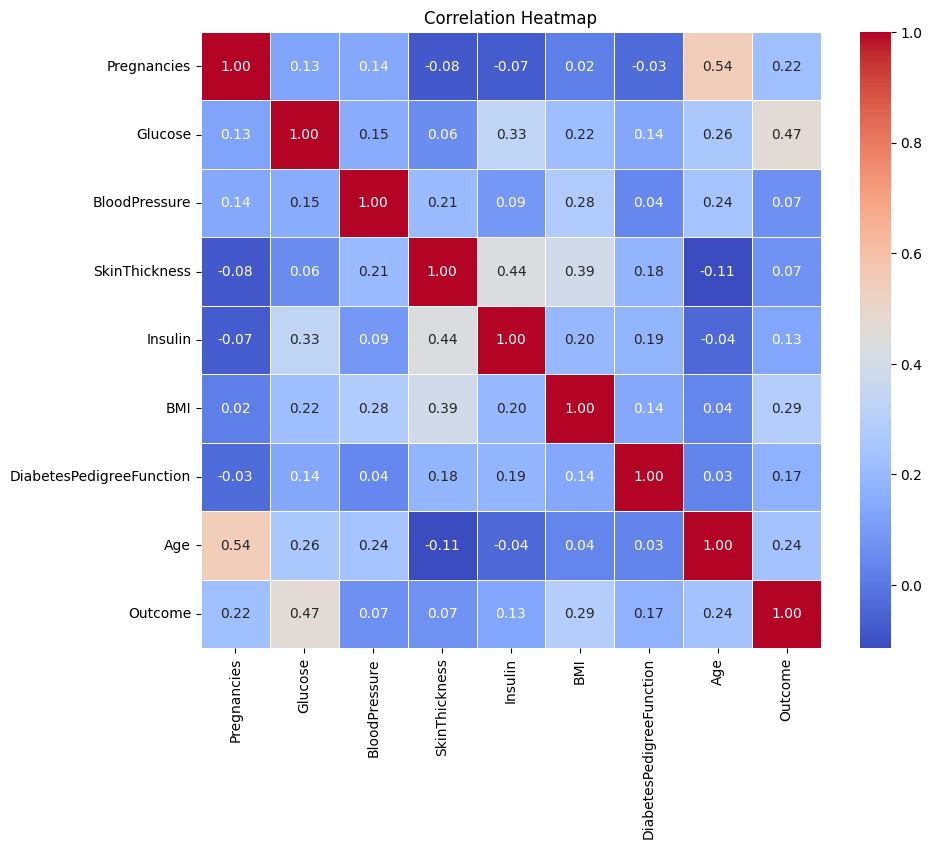

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'diabetes_dataset'
# with relevant features ('Pregnancies', 'Glucose', 'BMI', etc.)
# and an 'Outcome' column indicating diabetes status

# Compute the correlation matrix
correlation_matrix = diabetes_dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


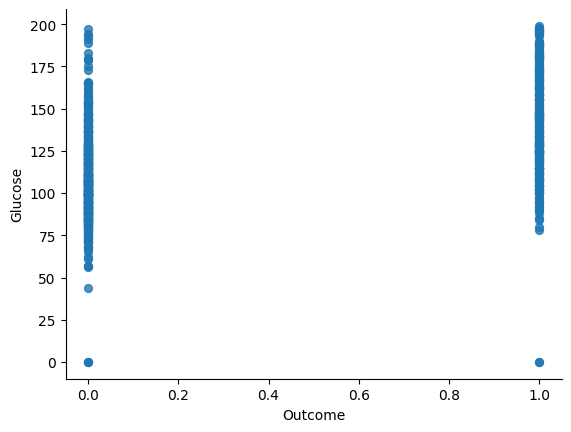

In [32]:

from matplotlib import pyplot as plt
# diabetes_dataset.plot(kind='scatter', x='Outcome', y='Pregnancies', s=32, alpha=.8)
diabetes_dataset.plot(kind='scatter', x='Outcome', y='Glucose', s=32, alpha=.8)
# diabetes_dataset.plot(kind='scatter', x='Outcome', y='BloodPressure', s=32, alpha=.8)
# diabetes_dataset.plot(kind='scatter', x='Outcome', y='SkinThickness', s=32, alpha=.8)
# diabetes_dataset.plot(kind='scatter', x='Outcome', y='BMI', s=32, alpha=.8)
# diabetes_dataset.plot(kind='scatter', x='Outcome', y='DiabetesPedigreeFunction', s=32, alpha=.8)
# diabetes_dataset.plot(kind='scatter', x='Outcome', y='Age', s=32, alpha=.8)

plt.gca().spines[['top', 'right',]].set_visible(False)



In [33]:
diabetes_dataset['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
129,14
125,14
...,...
191,1
177,1
44,1
